In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Fri Apr 19 15:03:42 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!unzip "/content/drive/MyDrive/Colab/BigDataProject/BirdSpecies20-Dataset-4000.zip"

Archive:  /content/drive/MyDrive/Colab/BigDataProject/BirdSpecies20-Dataset-4000.zip
   creating: birdSpecies02/
   creating: birdSpecies02/predict/
  inflating: birdSpecies02/predict/1.jpg  
  inflating: birdSpecies02/predict/2.jpg  
  inflating: birdSpecies02/predict/3.jpg  
  inflating: birdSpecies02/predict/4.jpg  
  inflating: birdSpecies02/predict/5.jpg  
  inflating: birdSpecies02/predict/6.jpg  
   creating: birdSpecies02/test/
   creating: birdSpecies02/test/ABBOTTS BABBLER/
  inflating: birdSpecies02/test/ABBOTTS BABBLER/1.jpg  
  inflating: birdSpecies02/test/ABBOTTS BABBLER/2.jpg  
  inflating: birdSpecies02/test/ABBOTTS BABBLER/3.jpg  
  inflating: birdSpecies02/test/ABBOTTS BABBLER/4.jpg  
  inflating: birdSpecies02/test/ABBOTTS BABBLER/5.jpg  
   creating: birdSpecies02/test/ABBOTTS BOOBY/
  inflating: birdSpecies02/test/ABBOTTS BOOBY/1.jpg  
  inflating: birdSpecies02/test/ABBOTTS BOOBY/2.jpg  
  inflating: birdSpecies02/test/ABBOTTS BOOBY/3.jpg  
  inflating: birdSpeci

In [ ]:
train_dir = '/content/birdSpecies02/train'
test_dir = '/content/birdSpecies02/test'
val_dir = '/content/birdSpecies02/valid'

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

datagen_no_augmentation = ImageDataGenerator(rescale=1./255)

train_dir = '/content/birdSpecies02/train'
val_dir = '/content/birdSpecies02/valid'
test_dir = '/content/birdSpecies02/test'

train_generator_no_aug = datagen_no_augmentation.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical'
)

validation_generator_no_aug = datagen_no_augmentation.flow_from_directory(
    val_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical'
)

test_generator_no_aug = datagen_no_augmentation.flow_from_directory(
    test_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical'
)

Found 4001 images belonging to 20 classes.
Found 100 images belonging to 20 classes.
Found 100 images belonging to 20 classes.


In [ ]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224,224,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(20, activation='softmax'))

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(
      train_generator_no_aug,
      steps_per_epoch=125,
      epochs=20,
      validation_data=validation_generator_no_aug,
      validation_steps=4
      )

Epoch 1/20
125/125 [==============================] - 17s 117ms/step - loss: 2.4274 - accuracy: 0.2507 - val_loss: 1.4616 - val_accuracy: 0.5400
Epoch 2/20
125/125 [==============================] - 14s 114ms/step - loss: 1.3074 - accuracy: 0.5921 - val_loss: 1.0101 - val_accuracy: 0.6900
Epoch 3/20
125/125 [==============================] - 15s 120ms/step - loss: 0.9170 - accuracy: 0.7196 - val_loss: 0.7316 - val_accuracy: 0.8000
Epoch 4/20
125/125 [==============================] - 14s 115ms/step - loss: 0.5899 - accuracy: 0.8113 - val_loss: 0.7476 - val_accuracy: 0.7400
Epoch 5/20
125/125 [==============================] - 15s 121ms/step - loss: 0.3448 - accuracy: 0.8932 - val_loss: 0.6846 - val_accuracy: 0.8600
Epoch 6/20
125/125 [==============================] - 15s 119ms/step - loss: 0.1724 - accuracy: 0.9433 - val_loss: 0.5560 - val_accuracy: 0.8400
Epoch 7/20
125/125 [==============================] - 15s 117ms/step - loss: 0.0905 - accuracy: 0.9710 - val_loss: 0.7489 - val_ac

In [ ]:
model.save('/content/drive/MyDrive/Colab/BigDataProject/savedModels/bird-species-CNN-no-data-augumentation-01.h5')

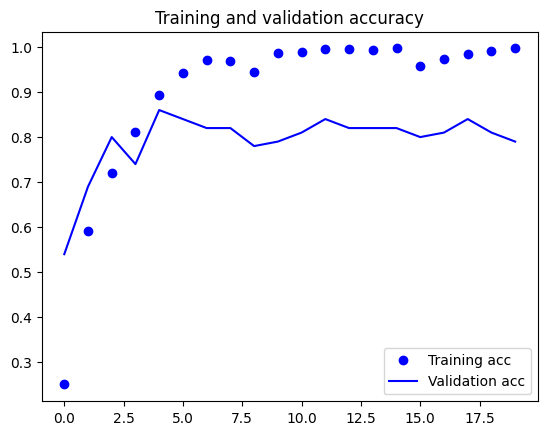

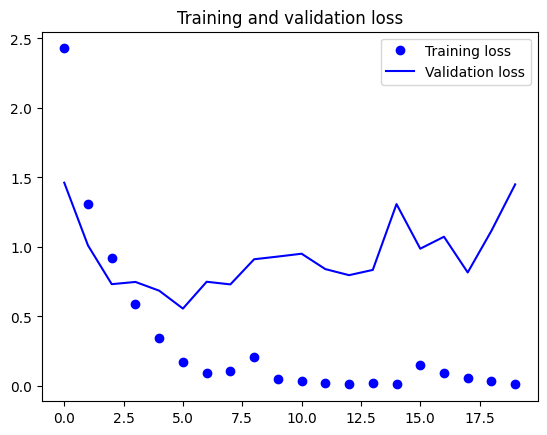

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

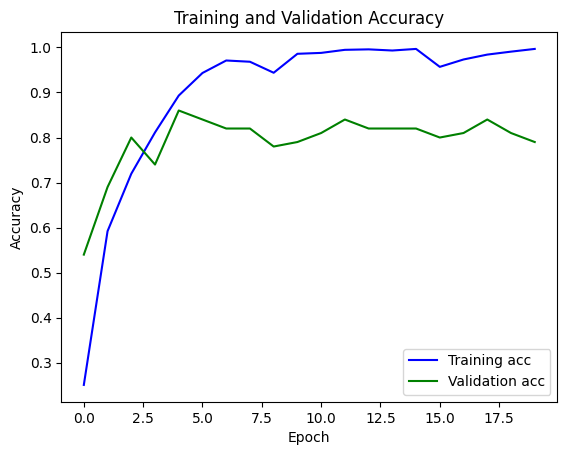

In [ ]:
plt.plot(history.history['accuracy'],c='blue')
plt.plot(history.history['val_accuracy'],c='green')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training acc','Validation acc'],loc='lower right')

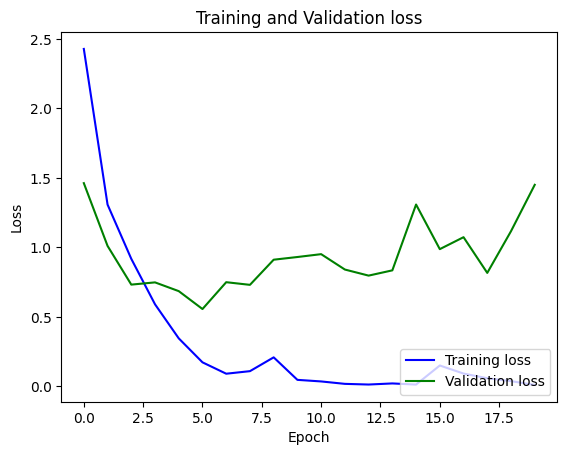

In [ ]:
plt.plot(history.history['loss'],c='blue')
plt.plot(history.history['val_loss'],c='green')
plt.title('Training and Validation loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training loss','Validation loss'],loc='lower right')

With Data Augmentation

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_val_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_dir = '/content/birdSpecies02/train'
val_dir = '/content/birdSpecies02/valid'
test_dir = '/content/birdSpecies02/test'

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = test_val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_val_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 4001 images belonging to 20 classes.
Found 100 images belonging to 20 classes.
Found 100 images belonging to 20 classes.


In [ ]:
from keras import layers, models, optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(20, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 222, 222, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 109, 109, 64)      256       
 chNormalization)                                                
                                                      

In [ ]:
history_aug = model.fit(
    train_generator,
    steps_per_epoch=125,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=4
)

Epoch 1/20
125/125 [==============================] - 66s 486ms/step - loss: 2.6050 - accuracy: 0.3034 - val_loss: 9.1951 - val_accuracy: 0.0500
Epoch 2/20
125/125 [==============================] - 57s 459ms/step - loss: 1.8372 - accuracy: 0.4487 - val_loss: 7.4241 - val_accuracy: 0.0900
Epoch 3/20
125/125 [==============================] - 59s 469ms/step - loss: 1.6553 - accuracy: 0.5097 - val_loss: 5.5247 - val_accuracy: 0.1900
Epoch 4/20
125/125 [==============================] - 59s 466ms/step - loss: 1.5078 - accuracy: 0.5417 - val_loss: 1.7542 - val_accuracy: 0.5600
Epoch 5/20
125/125 [==============================] - 58s 466ms/step - loss: 1.4309 - accuracy: 0.5714 - val_loss: 1.1604 - val_accuracy: 0.6400
Epoch 6/20
125/125 [==============================] - 57s 459ms/step - loss: 1.3280 - accuracy: 0.6007 - val_loss: 1.1326 - val_accuracy: 0.6800
Epoch 7/20
125/125 [==============================] - 59s 469ms/step - loss: 1.2244 - accuracy: 0.6188 - val_loss: 0.9418 - val_ac

In [ ]:
model.save('/content/drive/MyDrive/Colab/BigDataProject/savedModels/bird-species-CNN-with-DA-BN-Do02-02-1.h5')

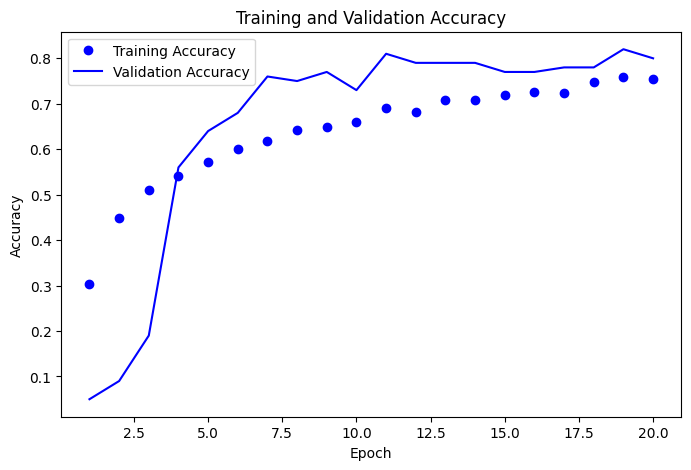

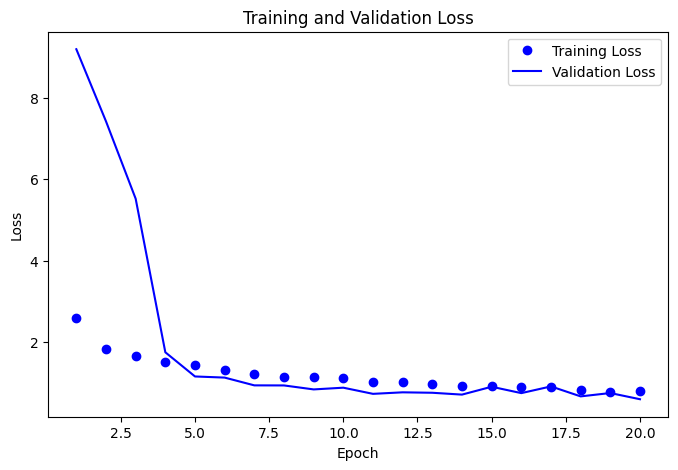

"\nplt.plot(history.history['accuracy'],c='red')\nplt.plot(history.history['val_accuracy'],c='green')\nplt.title('Accuracy')\nplt.ylabel('Accuracy')\nplt.xlabel('Epoch')\nplt.legend(['train','validation'],loc='lower right')\n"

In [ ]:
import matplotlib.pyplot as plt
acc = history_aug.history['accuracy']
val_acc = history_aug.history['val_accuracy']
loss = history_aug.history['loss']
val_loss = history_aug.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.figure(figsize=(8, 5))
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.figure(figsize=(8, 5))
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

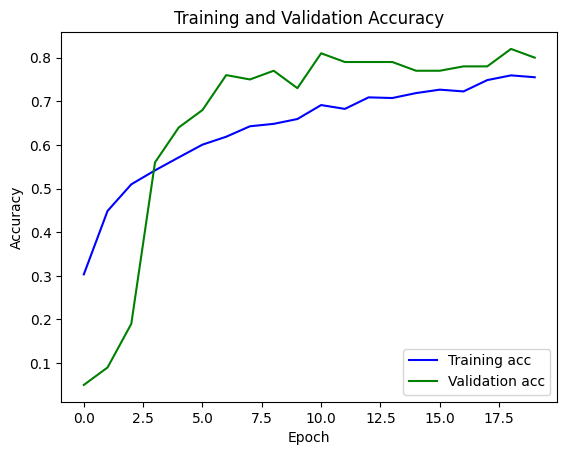

In [ ]:
plt.plot(history_aug.history['accuracy'],c='blue')
plt.plot(history_aug.history['val_accuracy'],c='green')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training acc','Validation acc'],loc='lower right')

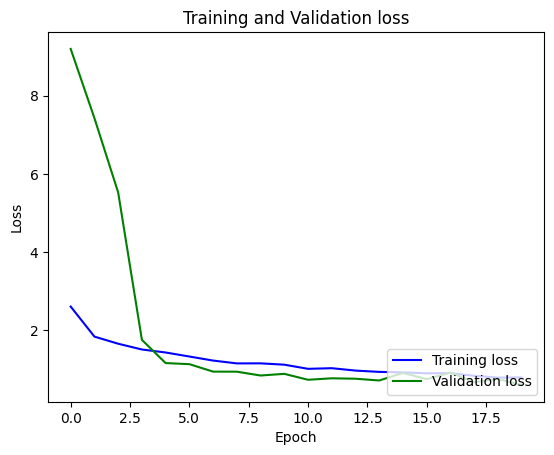

In [ ]:
plt.plot(history_aug.history['loss'],c='blue')
plt.plot(history_aug.history['val_loss'],c='green')
plt.title('Training and Validation loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training loss','Validation loss'],loc='lower right')

In [ ]:
test_loss, test_accuracy = model.evaluate(test_generator, steps=4)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

4/4 [==============================] - 0s 47ms/step - loss: 0.5930 - accuracy: 0.7800
Test Loss: 0.5930089950561523
Test Accuracy: 0.7799999713897705
